# Homework 7: Dimension Reduction

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'shruthis'

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [2]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import sklearn as sk
import sklearn.preprocessing as skp

# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# feel free to change the file location 
df_train = pd.read_csv("data_set_ALL_AML_train.csv")
df_test = pd.read_csv("data_set_ALL_AML_independent.csv")

df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

df_train2 = df_train.drop(['Gene Description','Gene Accession Number'],axis=0)
df_test2 = df_test.drop(['Gene Description','Gene Accession Number'],axis=0)


In [4]:
# df_train_copy = df_train2.copy()
# # df_train.iloc[1]
# df_train_copy.columns = df_train2.iloc[1]
# df_train_copy
# df_train_copy.index = pd.to_numeric(df_train_copy.index)
# df_train_copy.head()


In [5]:
# df_test_copy = df_test.copy()
# # df_train.iloc[1]
# df_test_copy.columns = df_test_copy.iloc[1]
# df_test_copy
# df_test_copy = df_test_copy.drop(['Gene Description','Gene Accession Number'],axis=0)
# df_test_copy.index = pd.to_numeric(df_test_copy.index)
# df_test_copy.head()

# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

In [6]:
# df_train.iloc[1]
df_train2.columns = df_train.iloc[1]
df_train2_copy = df_train2.copy()
df_train2_copy.ix[:,:] = skp.scale(df_train2_copy.ix[:,:].astype(np.float))

df_train2_copy.index = pd.to_numeric(df_train2_copy.index)
df_train2_copy.head()
    

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


In [7]:
# df_train.iloc[1]
df_test2.columns = df_test.iloc[1]
df_test2_copy = df_test2.copy()
df_test2_copy.ix[:,:] = skp.scale(df_test2_copy.ix[:,:].astype(np.float))

df_test2_copy.index = pd.to_numeric(df_test2_copy.index)
df_test2_copy.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.022196,1.556109,1.104685,-0.613631,-1.506468,1.001512,1.050378,0.909252,-0.394315,-0.784861
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.858006,-0.164410,-2.826066,-0.043162,-0.316934,-1.568936,-0.026902,-0.587509,-0.819890,0.229552
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,2.340276,-0.617178,0.550906,0.808408,1.274941,0.539495,0.145869,0.133154,3.423164,-0.205196
47,-1.643253,-0.416073,-1.298243,-0.154976,-0.480345,0.529544,-0.577594,0.064735,-0.075486,-0.894962,...,0.023944,-1.042084,0.442321,-1.163432,0.890092,0.103004,-0.499483,0.022283,0.329799,-0.846968
48,-0.272270,-0.054248,-0.236612,0.646857,0.446444,0.145483,-0.392439,0.798396,-0.536144,0.315576,...,0.595759,0.232633,0.930951,0.361954,0.050421,-0.177780,0.516820,0.558160,-0.044961,0.270957


(38, 2)

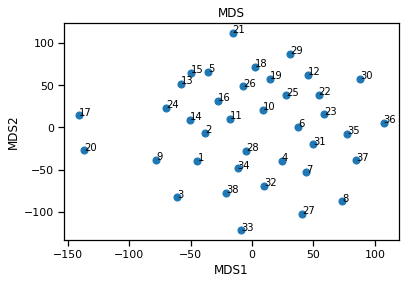

In [8]:
# df_train_copy

# df_train_copy.ix[:,:] = skp.scale(df_train_copy.ix[:,:].astype(np.float))
# df_train_copy.head(30)

# df_train_copy.index = pd.to_numeric(df_train_copy.index)
# df_train_copy = df_train_copy.sort_index(ascending = True)

# df_train_copy.head()

X = skm.MDS(n_components=2).fit_transform(df_train2_copy)
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_train2_copy.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)
    
X.shape

(34, 2)

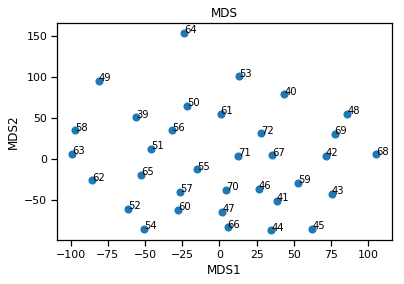

In [9]:
X = skm.MDS(n_components=2).fit_transform(df_test2_copy)
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_test2_copy.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)
    
X.shape

## 1.2. Interprete your results (10 pts.)

What can you see from your visualization(s)?

MDS seeks a low-dimensional representation of the data that preserves the distances in the high-dimensional space. It can take any kind of distance matrix as input, and can be interpreted by searching for clusters of data points. The 2D MDS plots for both the train and test data appear different in the way the data points are clustering -- the majority of the data in both data sets are clustered around 0 or the center, which indicates that the genes are more similar to eachother and may have similar attributes, however the train data has a wider range of variance on the negative side (possibly due to outliers) while the test data has more even spread in data points on both positive and negative sides of the plot.



# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [10]:
pca_model = skd.PCA().fit(df_train2_copy.ix[:,:])
pca_model.components_.shape


(38, 7129)

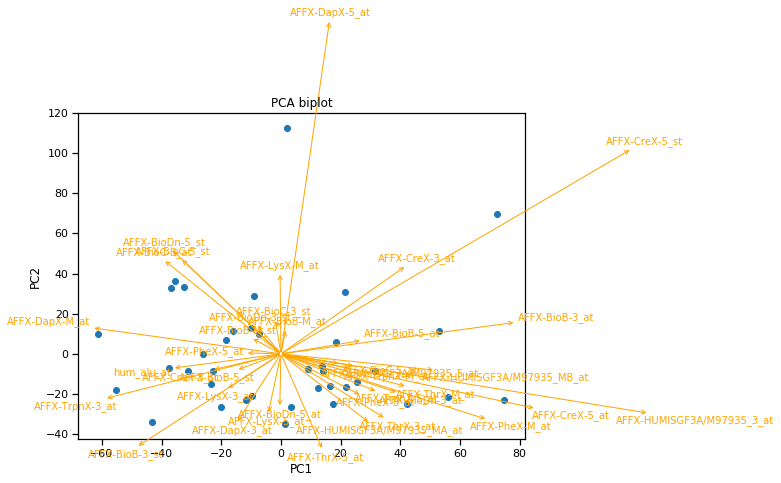

In [11]:

X = pca_model.transform(df_train2_copy.ix[:,:])
plt.figure(figsize=(8,6))
# plt.figure(figsize=(20,20))

plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
# plt.ylim(4, 10)

# Add variable unit vector projections
# V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(X):
    plt.annotate(df_train2_copy.columns[i], 
                 xy=(0,0), xytext=v[:2]*1.5, 
                 fontsize=10, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=1, color='orange'))


In [12]:
pca_model1 = skd.PCA().fit(df_test2_copy.ix[:,:])
pca_model1.components_.shape

(34, 7129)

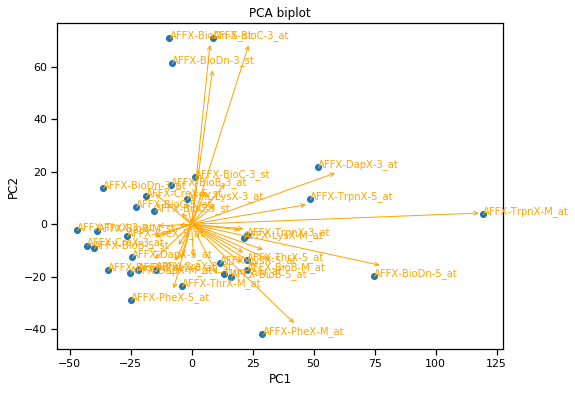

In [13]:

X = pca_model1.transform(df_test2_copy.ix[:,:])
plt.figure(figsize=(8,6))
# plt.figure(figsize=(20,20))

plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
# plt.ylim(4, 10)

# Add variable unit vector projections
# V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(X):
    plt.annotate(df_test2_copy.columns[i], 
                 xy=(0,0), xytext=v[:2]*1, 
                 fontsize=10, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=1, color='orange'))

In the above biplots, multiple arrows pointing towards the same direction for different genes would indicate that these genes  have a linear relationship and are aligned towards the same principal component.

## 2.2. How much of the variance does each component explain? (2 pts.)

In [14]:
pca_model.explained_variance_


array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

In [15]:
(pca_model.explained_variance_)/(pca_model.explained_variance_.sum())

array([1.49877930e-01, 1.19778111e-01, 6.60056806e-02, 4.88492199e-02,
       4.63241532e-02, 3.72196529e-02, 3.49097368e-02, 3.28968370e-02,
       2.98533570e-02, 2.64532179e-02, 2.50955698e-02, 2.35785408e-02,
       2.20532785e-02, 2.08786432e-02, 1.94178295e-02, 1.89340717e-02,
       1.84713718e-02, 1.71329025e-02, 1.70523096e-02, 1.64475646e-02,
       1.53558984e-02, 1.52876881e-02, 1.45609395e-02, 1.43109079e-02,
       1.41521484e-02, 1.37856801e-02, 1.34740603e-02, 1.30587329e-02,
       1.30315682e-02, 1.24908759e-02, 1.15991269e-02, 1.11680809e-02,
       1.03362895e-02, 9.97974912e-03, 9.23972538e-03, 8.59086723e-03,
       8.34768304e-03, 2.95582098e-32])

The explained variance and the explained variance ratios were calculated above and below for the components of the training and testing data sets. For the training dataset, there are 37 principal components, since 37 of the explained variances are above 1. The main ones are the first 3, since they explain 14.99%, 11.98%, and 6.60% of the variance respectively. The amount of variance that each component explains is calculated through the calculation of explained_variance/explained_variance_sums, for both the training data above and testing data below.


In [16]:
pca_model1.explained_variance_

array([1.28925760e+03, 6.69020838e+02, 4.57824890e+02, 4.02121129e+02,
       3.39351779e+02, 3.19107670e+02, 2.67401296e+02, 2.49684615e+02,
       2.32540675e+02, 2.26410906e+02, 2.05684049e+02, 1.91569389e+02,
       1.78235919e+02, 1.69430819e+02, 1.61646910e+02, 1.58194855e+02,
       1.51166041e+02, 1.45800570e+02, 1.40386621e+02, 1.36177952e+02,
       1.26648489e+02, 1.23956908e+02, 1.17515734e+02, 1.13403712e+02,
       1.05309878e+02, 1.01570757e+02, 9.62138924e+01, 9.14380580e+01,
       8.72846813e+01, 8.59240060e+01, 7.35361846e+01, 6.90288231e+01,
       6.21846603e+01, 2.54261229e-28])

In [17]:
(pca_model1.explained_variance_)/(pca_model1.explained_variance_.sum())

array([1.75527880e-01, 9.10848301e-02, 6.23312460e-02, 5.47473750e-02,
       4.62015493e-02, 4.34453851e-02, 3.64057444e-02, 3.39936807e-02,
       3.16595936e-02, 3.08250472e-02, 2.80031586e-02, 2.60814974e-02,
       2.42661924e-02, 2.30674091e-02, 2.20076573e-02, 2.15376721e-02,
       2.05807240e-02, 1.98502340e-02, 1.91131438e-02, 1.85401485e-02,
       1.72427457e-02, 1.68762964e-02, 1.59993532e-02, 1.54395159e-02,
       1.43375689e-02, 1.38285008e-02, 1.30991825e-02, 1.24489695e-02,
       1.18835019e-02, 1.16982507e-02, 1.00116925e-02, 9.39803108e-03,
       8.46622243e-03, 3.46167705e-32])

For the training dataset, there are 33 principal components, since 33 of the explained variances are above 1. The main one is the first one, since it explains 17.55% of the variance, with the second and third components also explaining 9.11% and 6.23% of the variance respectively.


## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

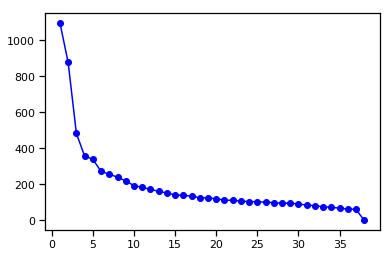

In [18]:
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')

The appropriate number of principal components to keep for the training data would be approximately 4-5, because this is where the scree plot begins to flatten, and these components would ideally have a variance greater than 1.

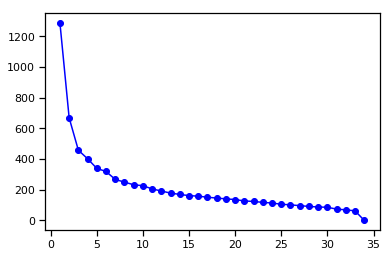

In [19]:
plt.plot(range(1,35),pca_model1.explained_variance_,'b-o')

The appropriate number of components to keep for the testing data would be approximately 3-4, because this is where the scree plot begins to flatten.

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

[]

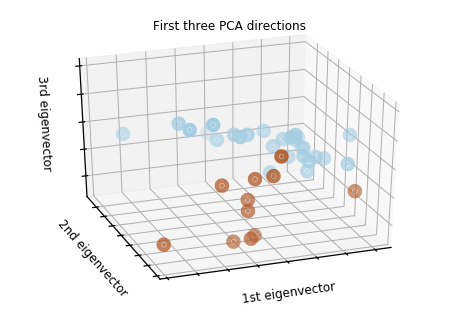

In [20]:
df_train2_copy['cat'] = list(pd.read_csv('actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df_train2_copy.replace(dic,inplace=True)
# df_whole2.head(3)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced = sklearn_pca.fit_transform(df_train2_copy)
Y=df_train2_copy['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])


[]

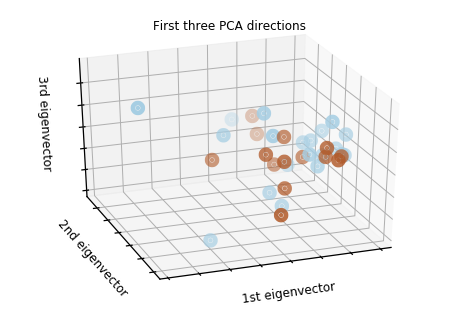

In [21]:
df_test2_copy['cat'] = list(pd.read_csv('actual.csv')[38:]['cancer'])
dic = {'ALL':0,'AML':1}
df_test2_copy.replace(dic,inplace=True)
# df_whole2.head(3)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced = sklearn_pca.fit_transform(df_test2_copy)
Y=df_test2_copy['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Based on the above visualizations and after discussing with my GSI, the distribution of the 2 cancer types (ALL  and ALM) in the training data set are quite different/distinct from one another, whereas the distributions of the cancer types are more similar in the testing dataset. Clusters of genes noted in these 3D plots would indicate they are more similar/more aligned with eachother.

# Part 3: Exploratory Factor Analysis

## 3.1. Create factor model with two factors and compare it to your PCA results. What are the similarities and differences? (10 pts.)

In [22]:
# Create a two-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(df_train2_copy.ix[:,:])

# Show the loadings
pd.DataFrame(fa_model.components_[:2,:].T, 
             index=df_train2_copy.columns,
             columns=['Factor1', 'Factor2'])

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:2,:].T, 
                   index=df_train2_copy.columns,
                   columns=['Factor1', 'Factor2'])
df_loadings.head()

,Factor1,Factor2
Gene Accession Number,,
AFFX-BioB-5_at,-0.431714,-0.038850
AFFX-BioB-M_at,-0.225081,-0.145810
AFFX-BioB-3_at,0.063192,-0.081246
AFFX-BioC-5_at,0.275885,0.189486
AFFX-BioC-3_at,-0.657452,0.154701


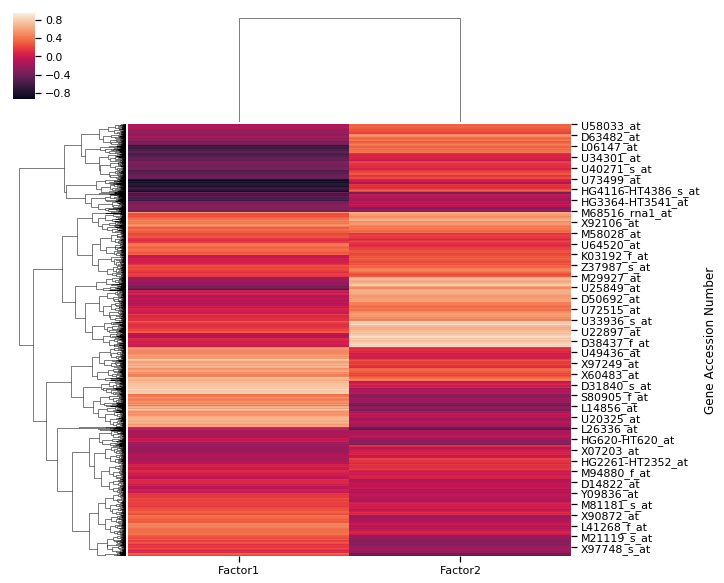

In [23]:
sns.clustermap(df_loadings)


In [24]:
# Create a two-factor model
fa_model2 = skd.FactorAnalysis(n_components=2).fit(df_test2_copy.ix[:,:])

# Show the loadings
pd.DataFrame(fa_model2.components_[:2,:].T, 
             index=df_test2_copy.columns,
             columns=['Factor1', 'Factor2'])

# Show the loadings
df_loadings2 = pd.DataFrame(fa_model2.components_[:2,:].T, 
                   index=df_test2_copy.columns,
                   columns=['Factor1', 'Factor2'])
df_loadings2.head()

,Factor1,Factor2
Gene Accession Number,,
AFFX-BioB-5_at,-0.286356,-0.002169
AFFX-BioB-M_at,-0.750687,0.081189
AFFX-BioB-3_at,-0.337849,-0.003934
AFFX-BioC-5_at,0.418797,0.017587
AFFX-BioC-3_at,-0.763732,0.069483


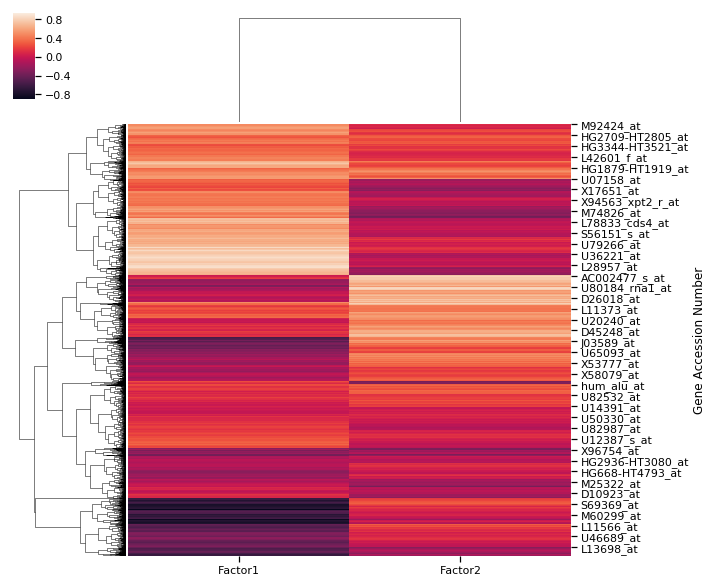

In [25]:
sns.clustermap(df_loadings2)


2 heatmaps were created for a 2-factor model for both the training and testing data sets. In the training 2-factor model, we can see that are more negative values for the components towards the top of Factor 1, and the values for these components vary significantly in Factor 2. This also holds true for the middle of the heatmap. Towards the bottom of this heatmap, the values across both factors are more similar for the lower components. For the 2-factor model for the testing data set, the middle-to-lower components have more similar values to each other across Factor 1 and Factor 2, with lower negative values for the lowest components in Factor 1 when compared to factor 2. The reverse is true for the top, with higher positive values for the top third components in Factor 1, which is greater than the values indicated for these same components in Factor 2. Based on the 2-factor model clustermaps we can identify approximately 2-3 groupings of relationships within the genes within the factors themselves -- for example, the dark purple section at the bottom of Factor 1 indicates a grouping of genes that are strongly related to each other.

Although it was recommended by a GSI to compare the values for different components in the PCA model to the same components in the 2-factor clustermap, this is difficult to compare in our specific visualization because the specific Gene Accension numbers visible in all plots are not the same (since it is a subset of all 7000+ values), and therefore a direct comparison cannot be made. However, we could theoretically assume that high values indicated for various Gene Accenstion Numbers in the PCA model visualization would ideally correspond to the values depicted in the 2-Factor clustermaps for respective training and testing datasets, although some differences in values can be assumed based on the differences in models and which factor the genes were assigned to, as well as if you are comparing PC1 to a specific factor compared to PC2 to another factor.

## 3.2. Create another factor model with an additional factor and compare it to the first. What might the factors represent? (10 pts.)

In [26]:
# Create a three-factor model
fa_model3 = skd.FactorAnalysis(n_components=3) \
              .fit(df_train2_copy.ix[:,:])

# Show the loadings
df_loadings3 = pd.DataFrame(fa_model3.components_[:3,:].T, 
                   index=df_train2_copy.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings3.head()

,Factor1,Factor2,Factor3
Gene Accession Number,,,
AFFX-BioB-5_at,-0.426795,-0.048733,0.126155
AFFX-BioB-M_at,-0.215827,-0.150109,0.152440
AFFX-BioB-3_at,0.068062,-0.080189,0.030317
AFFX-BioC-5_at,0.294874,0.189388,0.631264
AFFX-BioC-3_at,-0.646943,0.138461,0.366555


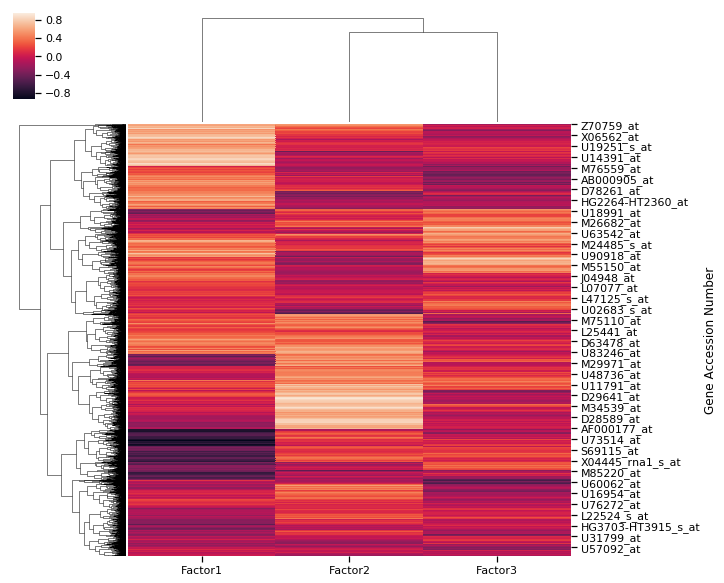

In [27]:
sns.clustermap(df_loadings3)


In [28]:
# Create a three-factor model
fa_model4 = skd.FactorAnalysis(n_components=3) \
              .fit(df_test2_copy.ix[:,:])

# Show the loadings
df_loadings4 = pd.DataFrame(fa_model4.components_[:3,:].T, 
                   index=df_test2_copy.columns,
                   columns=['Factor1', 'Factor2', 'Factor3'])
df_loadings4.head()

,Factor1,Factor2,Factor3
Gene Accession Number,,,
AFFX-BioB-5_at,-0.283765,0.015879,0.320274
AFFX-BioB-M_at,-0.752897,0.079792,-0.094112
AFFX-BioB-3_at,-0.340347,0.005592,0.251061
AFFX-BioC-5_at,0.419666,0.018533,-0.016913
AFFX-BioC-3_at,-0.762318,0.079210,0.151041


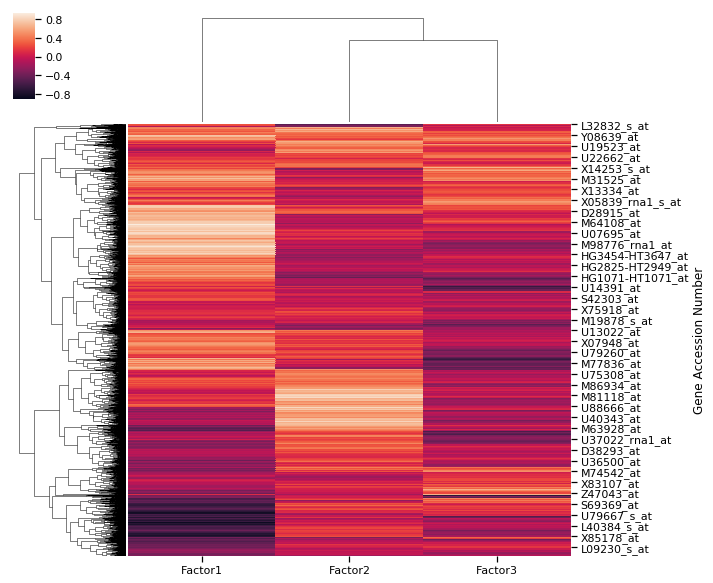

In [29]:
sns.clustermap(df_loadings4)


When comparing the 3-Factor models to the 2-Factor models created above for both the training and testing data sets, the distribution of loadings vary between 3-factors and 2-factors for both datasets. In the training dataset, Factor 1 has components with high loadings at the top with decreasing loadings towards the bottom and high negative loadings towards the bottom, high loadings towards the middle of Factor 2 with a mix of values above and below, and a mix of loadings in Factor 3. In the testing data set 3-factor model, Factor 1 has high loadings about a fifth of the way down the factor, whereas Factor 2 has highloadings about two-thirds down the Factor, and factor three has a majority of negative loadings. The factors might represent groupings of gene accension numbers with similar loadings, possibly indicating genes with similar expression pathways/level of expression, and as mentioned above, bands of similar colorings in each cluster may indicate more similarly related genes. For example, the 3 factors could be active, inactive or neutrally expressed genes in the cancer tumor cells, which would indicate that similar activations of genes are goruped together. 



# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_train2_copy.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)



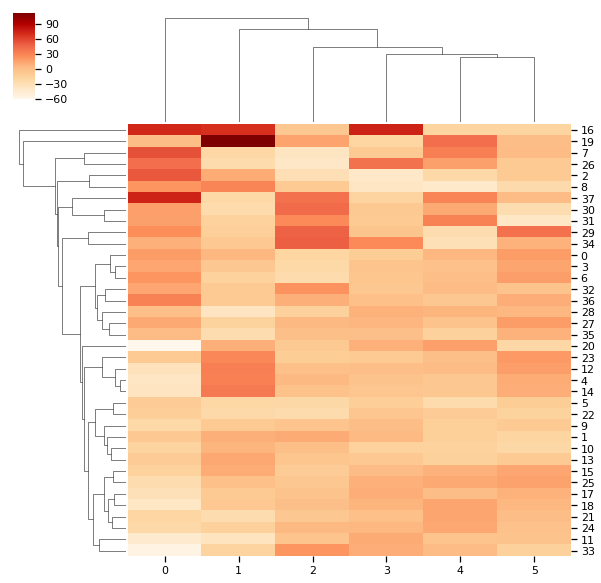

In [31]:
sns.clustermap(Y_sklearn,cmap=plt.cm.OrRd)

In [32]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_test2_copy.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=6)
Y_sklearn2 = sklearn_pca.fit_transform(X_std)

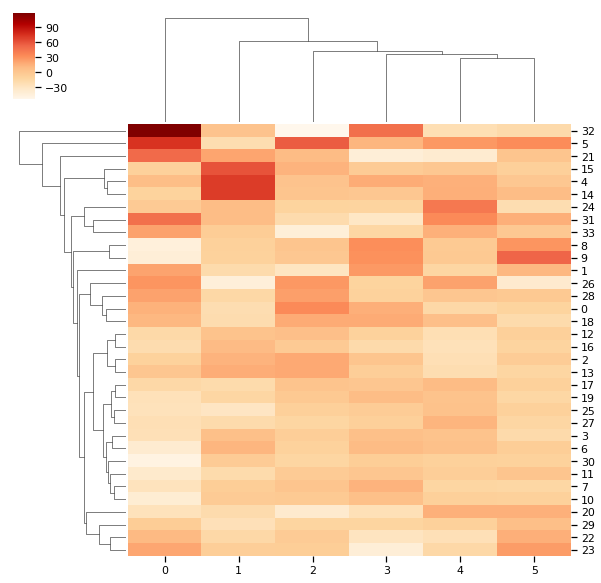

In [33]:
sns.clustermap(Y_sklearn2,cmap=plt.cm.OrRd)

In [34]:
Y_sklearn2.shape

(34, 6)

The PCA models for the training and testing data sets were created and tuned to yield 6 components. As discussed with Sungjin, For example in the clustermap for the training data's model, the first component has loadings that are more positive in comparison to the 6th component, and only the first and second components had a few strongly positive loadings. It is interesting to note the variance in values across components for the same row values. For the testing data, which was also tuned to 6 components, the first and second components again have more strongly positive loadings compared to the other components, and all rows had variances in loading values across components.


In [42]:
n_samples, n_features = df_test2_copy.shape
print(n_samples, n_features)

34 7130


In [43]:
from sklearn import metrics
np.sqrt(n_samples/2)

4.123105625617661

Under the rule of thumb method, the number of clusters in the testing data appears to be approximately 4.


(1, 11.45)

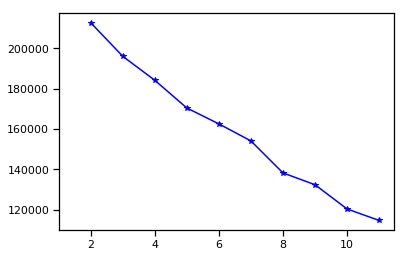

In [50]:
from sklearn.cluster import KMeans

cost = []
for k in range(2,12):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(df_test2_copy)
    cost.append(k_means.inertia_)
    
fig, ax = plt.subplots()
plt.plot(range(2,12), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

Under the elbow method, the first elbow appears to be at around 4. This therefore indicates the number clusters to be 4.

(1, 9.35)

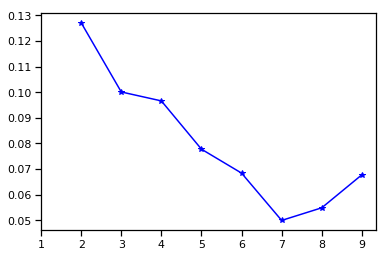

In [52]:
from sklearn import metrics
list1 = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(df_test2_copy)
    list1.append(metrics.silhouette_score(df_test2_copy, k_means.labels_))

fig, ax = plt.subplots()
plt.plot(range(2,10), list1, 'b*-')
plt.xlim(1, plt.xlim()[1])         
    

Under the silhouette method, the number of clusters in the testing data to be approximately 4.



Because the Silhouette and Elbow methods both indicate 4 clusters in the testing data, that is the number that will be used.

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data(5 pts.)
- Interprete your results (5 pts.)

(YOUR INTERPRETATION HERE)

do kmeans clustering with (X[:,0], X[:,1])

In [35]:
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# from sklearn.datasets import load_digits
# from sklearn.preprocessing import scale
# # digits = load_digits()
# # data = scale(digits.data)
# n_digits = len(np.unique(digits.target))
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(X[:,:2])
# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# reduced_data = PCA(n_components=2).fit_transform(data)

# kmeans.fit(reduced_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
k_means.labels_

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

In [37]:
X[:,:2]

array([[ 15.95448542, -19.99834392],
       [ 22.69096166, -17.48739567],
       [ -8.39114753,  15.12789841],
       [-22.75573236,   6.73652983],
       [  8.93688868,  70.86333562],
       [ 74.82267454, -19.58153972],
       [-36.24993214,  13.98872717],
       [-26.51901189,  -4.33741498],
       [-42.76176193,  -8.09820213],
       [-40.09887723,  -8.87177367],
       [-38.55923363,  -2.63399944],
       [-34.29824024, -17.52216445],
       [-15.21692711,   4.89738306],
       [  1.31779602,  17.91495013],
       [ -9.05872252,  71.02281923],
       [ -7.85415313,  61.36215697],
       [-18.75424241,  10.95053235],
       [-14.73243115, -17.23730695],
       [ 13.16124213, -18.85909445],
       [-24.24802738, -12.36591105],
       [-25.15194972, -18.41865876],
       [ 51.65889417,  21.67066542],
       [ 11.60661937, -14.91225043],
       [ 21.34542234,  -5.05505036],
       [ -1.94330824,   9.76246863],
       [-24.70515987, -29.0489048 ],
       [ 29.05769668, -41.99697464],
 

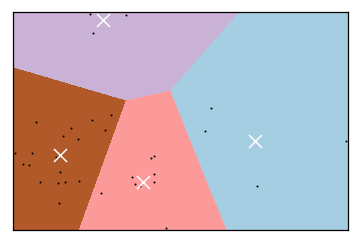

In [54]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_test2_copy)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

The above visualization again shows 4 distinct clusters of the data points in the test data set, based on the 4 different colorings of the clustered points, which matches the number of clusters identified above in the other analysis.